In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
start = '2020-01-01'
end = '2024-03-13'

# Get the data
df = yf.download('RELIANCE.NS', start=start, end=end)
df = df[['Open', 'High', 'Low', 'Close']]
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close
Date                                                          
2020-01-01  1387.957031  1396.277466  1376.527954  1380.276611
2020-01-02  1382.471069  1408.941040  1382.471069  1403.775024
2020-01-03  1401.671997  1409.581055  1392.528687  1405.466553
2020-01-06  1389.785767  1397.008911  1369.670410  1372.870605
2020-01-07  1388.871338  1403.043579  1383.842529  1393.991699


In [3]:
df.tail()

,Open,High,Low,Close
Date,,,,
2024-03-05,3011.550049,3014.800049,2972.100098,3000.399902
2024-03-06,2986.899902,3018.000000,2957.000000,3006.000000
2024-03-07,3005.949951,3006.199951,2951.100098,2957.850098
2024-03-11,2978.000000,2978.000000,2927.000000,2933.199951
2024-03-12,2933.199951,2976.000000,2930.050049,2950.850098


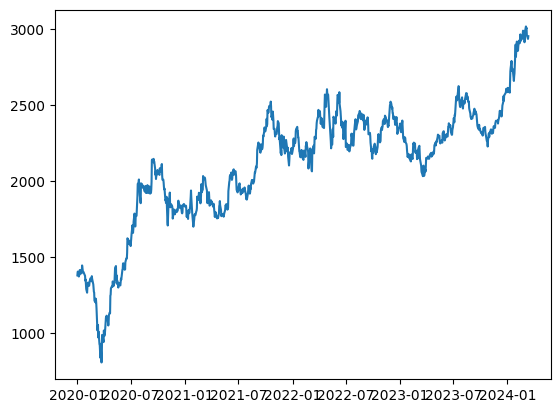

In [4]:
plt.plot(df.Close)

In [5]:
df

,Open,High,Low,Close
Date,,,,
2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611
2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024
2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553
2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605
2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699
...,...,...,...,...
2024-03-05,3011.550049,3014.800049,2972.100098,3000.399902
2024-03-06,2986.899902,3018.000000,2957.000000,3006.000000
2024-03-07,3005.949951,3006.199951,2951.100098,2957.850098


In [6]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2020-01-01            NaN
2020-01-02            NaN
2020-01-03            NaN
2020-01-06            NaN
2020-01-07            NaN
                 ...     
2024-03-05    2586.529492
2024-03-06    2593.505493
2024-03-07    2599.633494
2024-03-11    2605.471494
2024-03-12    2611.486995
Name: Close, Length: 1041, dtype: float64

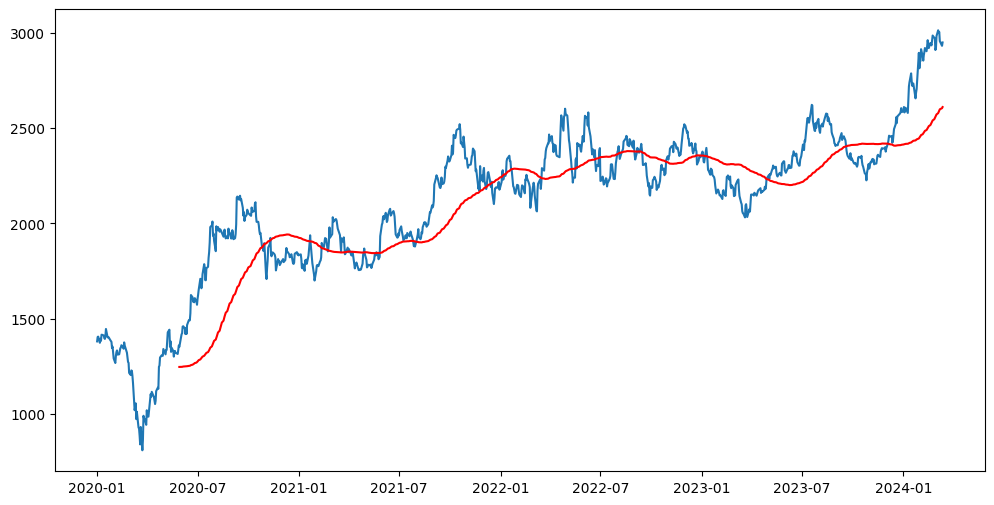

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [8]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2020-01-01            NaN
2020-01-02            NaN
2020-01-03            NaN
2020-01-06            NaN
2020-01-07            NaN
                 ...     
2024-03-05    2499.920643
2024-03-06    2503.693278
2024-03-07    2507.249391
2024-03-11    2510.645796
2024-03-12    2514.070226
Name: Close, Length: 1041, dtype: float64

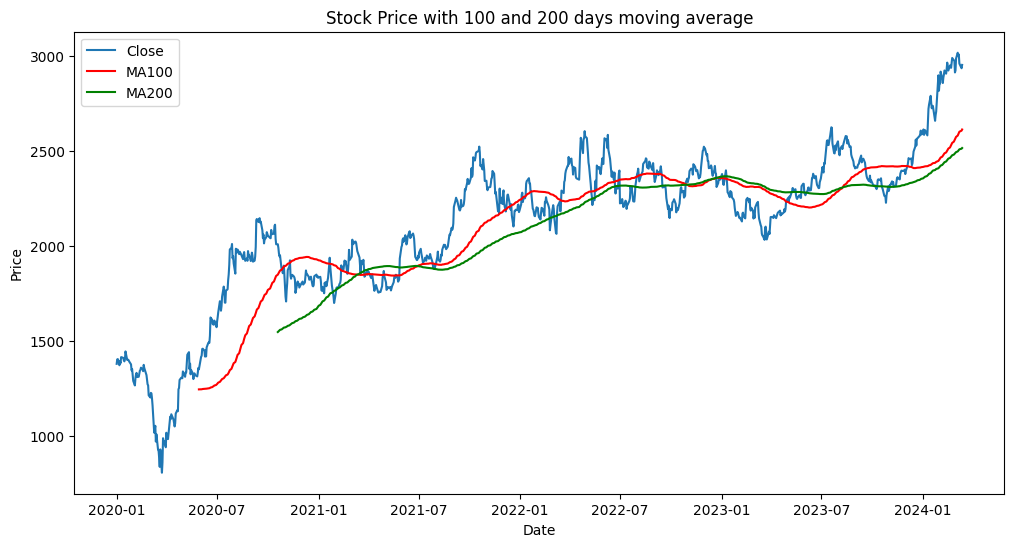

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.legend(['Close', 'MA100', 'MA200'])
plt.title('Stock Price with 100 and 200 days moving average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [10]:
df.shape

(1041, 4)

In [11]:
# splitting the data into training and test set

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(728, 1)
(313, 1)


In [12]:
data_training.head()

,Close
Date,
2020-01-01,1380.276611
2020-01-02,1403.775024
2020-01-03,1405.466553
2020-01-06,1372.870605
2020-01-07,1393.991699


In [13]:
data_testing.head()

,Close
Date,
2022-12-06,2483.053711
2022-12-07,2446.410645
2022-12-08,2445.256836
2022-12-09,2408.198486
2022-12-12,2411.890381


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.31874677],
       [0.33184215],
       [0.33278482],
       [0.3146195 ],
       [0.32639002],
       [0.32055571],
       [0.33831341],
       [0.33813504],
       [0.33612236],
       [0.32883585],
       [0.32600784],
       [0.33316694],
       [0.35512844],
       [0.330339  ],
       [0.33112881],
       [0.33084853],
       [0.32753651],
       [0.32483592],
       [0.31719267],
       [0.29946048],
       [0.30358782],
       [0.28519317],
       [0.26883672],
       [0.25551209],
       [0.27635256],
       [0.28761349],
       [0.29235227],
       [0.28004677],
       [0.28104039],
       [0.2897791 ],
       [0.29872162],
       [0.30068335],
       [0.3075368 ],
       [0.3027725 ],
       [0.29724391],
       [0.31579142],
       [0.30669604],
       [0.28580461],
       [0.2712571 ],
       [0.25882411],
       [0.25589427],
       [0.22654434],
       [0.22017506],
       [0.2337799 ],
       [0.23217484],
       [0.21762733],
       [0.19716898],
       [0.117

In [16]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
#ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 100) #Train the model using the training data

Epoch 1/100
20/20 [==============================] - 12s 200ms/step - loss: 0.2479
Epoch 2/100
20/20 [==============================] - 4s 199ms/step - loss: 0.0959
Epoch 3/100
20/20 [==============================] - 4s 195ms/step - loss: 0.0283
Epoch 4/100
20/20 [==============================] - 4s 206ms/step - loss: 0.0236
Epoch 5/100
20/20 [==============================] - 4s 219ms/step - loss: 0.0203
Epoch 6/100
20/20 [==============================] - 4s 195ms/step - loss: 0.0201
Epoch 7/100
20/20 [==============================] - 4s 203ms/step - loss: 0.0167
Epoch 8/100
20/20 [==============================] - 4s 208ms/step - loss: 0.0175
Epoch 9/100
20/20 [==============================] - 4s 193ms/step - loss: 0.0191
Epoch 10/100
20/20 [==============================] - 4s 187ms/step - loss: 0.0171
Epoch 11/100
20/20 [==============================] - 4s 188ms/step - loss: 0.0156
Epoch 12/100
20/20 [==============================] - 4s 185ms/step - loss: 0.0148
Epoch 13/100

In [21]:
model.save('./LSTM_model.h5')

C:\Users\Aditya\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
data_testing.head()

,Close
Date,
2022-12-06,2483.053711
2022-12-07,2446.410645
2022-12-08,2445.256836
2022-12-09,2408.198486
2022-12-12,2411.890381


In [23]:
past_100_days = data_training.tail(100)

In [24]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_32616\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [25]:
final_df.head()

,Close
0,2237.259033
1,2234.074463
2,2194.477783
3,2212.568604
4,2216.860596


In [26]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.20905001],
       [0.20581052],
       [0.16553098],
       [0.18393378],
       [0.18829979],
       [0.20750079],
       [0.22144371],
       [0.28331811],
       [0.26763822],
       [0.28341223],
       [0.20576358],
       [0.20679647],
       [0.20463706],
       [0.24022202],
       [0.28937414],
       [0.35077941],
       [0.35998081],
       [0.38035527],
       [0.34800955],
       [0.31242459],
       [0.34354966],
       [0.35796221],
       [0.36603684],
       [0.40537737],
       [0.42255953],
       [0.43556368],
       [0.43194893],
       [0.38739726],
       [0.38058996],
       [0.41833458],
       [0.41171504],
       [0.40448554],
       [0.39129364],
       [0.37218676],
       [0.41002501],
       [0.337212  ],
       [0.30913841],
       [0.34603789],
       [0.3714355 ],
       [0.35725789],
       [0.36068488],
       [0.34556851],
       [0.37256226],
       [0.39293673],
       [0.36345474],
       [0.33937165],
       [0.2797503 ],
       [0.282

In [27]:
input_data.shape

(413, 1)

In [28]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [29]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(313, 100, 1)
(313,)


In [30]:
#making predictions
y_pred = model.predict(x_test)

10/10 [==============================] - 1s 54ms/step


In [31]:
y_pred.shape

(313, 1)

In [32]:
y_test

array([0.4590835 , 0.42180851, 0.42063481, 0.38293737, 0.38669294,
       0.39786624, 0.38894647, 0.35406559, 0.34209433, 0.37373597,
       0.39486169, 0.35983999, 0.35354926, 0.28256709, 0.30308237,
       0.32247113, 0.32223643, 0.3211566 , 0.32481829, 0.35176536,
       0.33406663, 0.29791841, 0.29369322, 0.31514751, 0.37138856,
       0.33533421, 0.30505428, 0.25383612, 0.25008056, 0.22801607,
       0.26059648, 0.25674679, 0.25425881, 0.22665461, 0.21505886,
       0.20158557, 0.17022556, 0.12778661, 0.14881845, 0.14327874,
       0.13018096, 0.11802194, 0.11994666, 0.10346858, 0.09825768,
       0.14149483, 0.14534427, 0.12712947, 0.11464189, 0.16604755,
       0.21660807, 0.21482417, 0.22435414, 0.20013024, 0.21862691,
       0.16679856, 0.15609489, 0.17130539, 0.15642345, 0.11389063,
       0.13393652, 0.11717681, 0.17290154, 0.19477827, 0.20290009,
       0.14834882, 0.11403144, 0.07816485, 0.07013716, 0.03361318,
       0.02314419, 0.0205154 , 0.        , 0.06426887, 0.07074

In [33]:
y_pred

array([[0.3941974 ],
       [0.40614828],
       [0.4189211 ],
       [0.43198058],
       [0.44499204],
       [0.45766807],
       [0.469771  ],
       [0.48109347],
       [0.49138093],
       [0.5003026 ],
       [0.5076043 ],
       [0.5130869 ],
       [0.5165236 ],
       [0.51785064],
       [0.51708686],
       [0.514326  ],
       [0.50983334],
       [0.5039357 ],
       [0.4969449 ],
       [0.48915637],
       [0.4808603 ],
       [0.47230598],
       [0.463701  ],
       [0.4553856 ],
       [0.44744152],
       [0.4399811 ],
       [0.4331136 ],
       [0.42686623],
       [0.42114028],
       [0.41583028],
       [0.410784  ],
       [0.40589264],
       [0.40109897],
       [0.39636123],
       [0.39164525],
       [0.38699228],
       [0.38230002],
       [0.377583  ],
       [0.3729524 ],
       [0.3683535 ],
       [0.36377415],
       [0.35920414],
       [0.3548085 ],
       [0.35080183],
       [0.34723598],
       [0.3441777 ],
       [0.3415825 ],
       [0.339

In [34]:
scaler.scale_

array([0.00101725])

In [35]:
scale_factor = 1/0.00101725
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

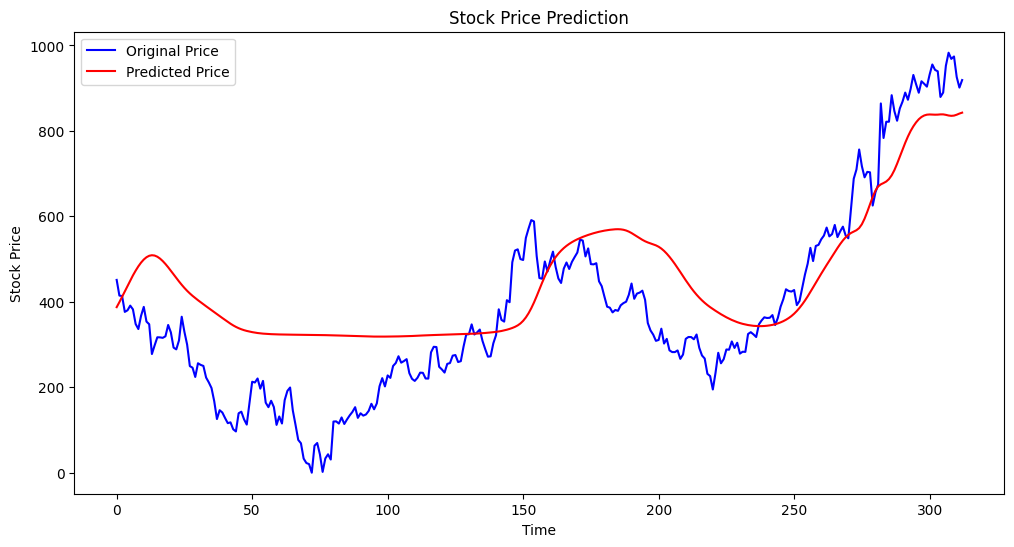

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()